In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [3]:
%load_ext autoreload
%autoreload 2
from scripts.models.ltr_gbt.train import LTRGBTTrain
from scripts.models.ltr_gbt.metrics import LTRGBTMetrics

%reload_ext autoreload

# Entrenamiento

Para encontrar los mejores hiperparámetros de gbt (https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

1. Elegimos un learning rate alto: 0.1
2. Escogemos el número óptimo de árboles para esta tasa
3. Para esa tasa y número de estimadores, elegimos los mejores parámetros
de árbol.
4. Bajamos la tasa y subimos el número de estimadores

- Con la primera prueba, se ha estimado que el número óptimo de árboles
es de 80
- Con la segunda prueba, obtenemos min_samples_split=800 y max_depth=9
- Obtenemos también subsample=9 y min_samples_leaf=60

In [19]:
ltr_params = {
    'key_events': ['goal', 'red_card', 'penalty'],
    'lags': [1, 3, 5],
    'target_metric': 'cosine_tfidf',
    'drop_teams': True,
    'lemma': True,
    'metric_params': {'ngram_range': (1, 2), 'strip_accents': 'unicode'},
    'count_vec_kwargs': {'ngram_range': (1, 2), 'strip_accents': 'unicode'}
}
cat_features_dict = {'is_key_event': [0, 1]}
num_features = ['tfidf_sum']
model_params = {
    'min_samples_split': 500,
    'min_samples_leaf': 50,
    'subsample': 0.8,  
    'learning_rate': 0.1
}

In [7]:
ltr_train = LTRGBTTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params)

Setting target metric to cosine_tfidf


In [20]:
# 1st iteration

model_params = {
    'min_samples_leaf': [50],
    'subsample': [0.8],  
    'learning_rate': [0.1],
    'n_estimators': range(20,81,10),
    'max_depth': [8],
    'min_samples_split': [800]
}
cv = 5
opt_metric = 'neg_mean_squared_error'
ltr_train = LTRGBTTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params,
                    cv=cv, opt_metric=opt_metric)


Setting target metric to cosine_tfidf


In [20]:
# 1st iteration

model_params = {
    'min_samples_leaf': [50],
    'subsample': [0.8],  
    'learning_rate': [0.1],
    'n_estimators': range(20,81,10),
    'max_depth': [8],
    'min_samples_split': [800]
}
cv = 5
opt_metric = 'neg_mean_squared_error'
ltr_train = LTRGBTTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params,
                    cv=cv, opt_metric=opt_metric)


Setting target metric to cosine_tfidf


In [26]:
# 2nd iteration

model_params = {
    'min_samples_leaf': [50],
    'subsample': [0.8],  
    'learning_rate': [0.1],
    'n_estimators': [80],
    'max_depth':range(5,16,2),
    'min_samples_split': range(200,1001,200)
}
cv = 5
opt_metric = 'neg_mean_squared_error'
ltr_train = LTRGBTTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params,
                    cv=cv, opt_metric=opt_metric)


Setting target metric to cosine_tfidf


In [32]:
# 3rd iteration

model_params = {
    'min_samples_leaf': [50],
    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],  
    'learning_rate': [0.1],
    'n_estimators': [80],
    'max_depth':[11],
    'min_samples_split': [200],
}
cv = 5
opt_metric = 'neg_mean_squared_error'
ltr_train = LTRGBTTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params,
                    cv=cv, opt_metric=opt_metric)


Setting target metric to cosine_tfidf


In [38]:
# Last

model_params = {
    'min_samples_leaf': [50],
    'subsample': [0.9],  
    'learning_rate': [0.1],
    'n_estimators': [80],
    'max_depth':[11],
    'min_samples_split': [200],
}
cv = 5
opt_metric = 'neg_mean_squared_error'
ltr_train = LTRGBTTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params,
                    cv=cv, opt_metric=opt_metric)


Setting target metric to cosine_tfidf


In [39]:
%%time
ltr_train.train()

Reading /home/carlos/MasterDS/tfm/data/csv/summaries/ltr/features_targets/ca4ee45b98/train.csv
Categorizing n_players...
Computing new length...
Dropping {'n_players', 'event_ix', 'sim_previous_1', 'length', 'sim_previous_3', 'sentence_ix', 'url', 'total_length', 'n_players_cat', 'sim_previous_5', 'equalize', 'score', 'json_file', 'advantage', 'players_importance', 'position', 'n_stop'}
Using cv with 5 folds optimizing neg_mean_squared_error
Training model...
Writing model to /home/carlos/MasterDS/tfm/models/ltr_gbt/433610900a/ckpt.pickle
Writing model info to /home/carlos/MasterDS/tfm/models/ltr_gbt/433610900a/model_info.pickle
CPU times: user 51.3 s, sys: 144 ms, total: 51.5 s
Wall time: 2min 5s


## Salida

In [40]:
model = ltr_train.read_model()

In [41]:
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(categories=[[0,
                                                                                              1]],
                                                                                 drop='first'))]),
                                                  ['is_key_event'])])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=GradientBoostingRegressor(random_state=10),
                              n_jobs=5,
                              param_grid={'learning_rate': [0.1],
                                          'max_depth': [11],
                                          'min_samples_leaf': [50],
                       

In [42]:
model_info = ltr_train.read_model_info()

El número de jugadores no aporta nada

In [43]:
# La salida de mse de una etapa de cv en sklearn es negativa
model_info

{'best_score': -0.020062515120886797,
 'best_params': {'learning_rate': 0.1,
  'max_depth': 11,
  'min_samples_leaf': 50,
  'min_samples_split': 200,
  'n_estimators': 80,
  'subsample': 0.9},
 'model_out':            Gini-importance
 x0_1              0.175483
 tfidf_sum         0.824517}

In [44]:
model_info['model_out']

,Gini-importance
x0_1,0.175483
tfidf_sum,0.824517


## Métricas

In [45]:
ltr_metrics = LTRGBTMetrics(ltr_train)

In [46]:
ltr_metrics.run()

Computing metric for train dataset
Reading /home/carlos/MasterDS/tfm/data/csv/summaries/ltr/features_targets/ca4ee45b98/train.csv
Categorizing n_players...
Computing new length...
Dropping {'n_players', 'event_ix', 'sim_previous_1', 'length', 'sim_previous_3', 'sentence_ix', 'url', 'total_length', 'n_players_cat', 'sim_previous_5', 'equalize', 'score', 'json_file', 'advantage', 'players_importance', 'position', 'n_stop'}
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_gbt/433610900a/train_metrics.pickle
Computing metric for validation dataset
Reading /home/carlos/MasterDS/tfm/data/csv/summaries/ltr/features_targets/ca4ee45b98/validation.csv
Categorizing n_players...
Computing new length...
Dropping {'n_players', 'event_ix', 'sim_previous_1', 'length', 'sim_previous_3', 'sentence_ix', 'url', 'total_length', 'n_players_cat', 'sim_previous_5', 'equalize', 'score', 'json_file', 'advantage', 'players_importance', 'position', 'n_stop'}
Writing metrics to /home/carlos/MasterDS/tfm/mod

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_gbt/433610900a/train_metrics.pickle
mse : 0.019646747322280982
mae : 0.11180088633431674
r2 : 0.19843703917175082


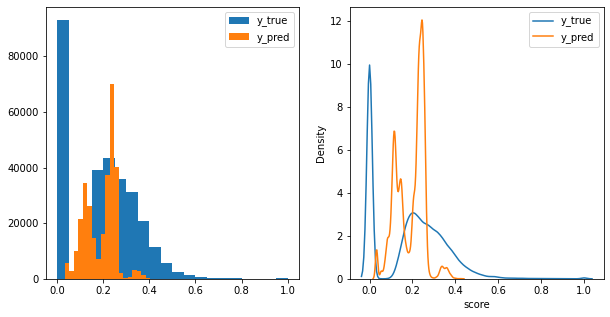

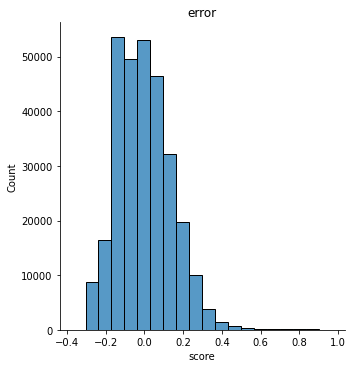

In [47]:
ltr_metrics.show_metrics('train')

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_gbt/433610900a/validation_metrics.pickle
mse : 0.01988700668929729
mae : 0.11275245692015247
r2 : 0.18389565203212643


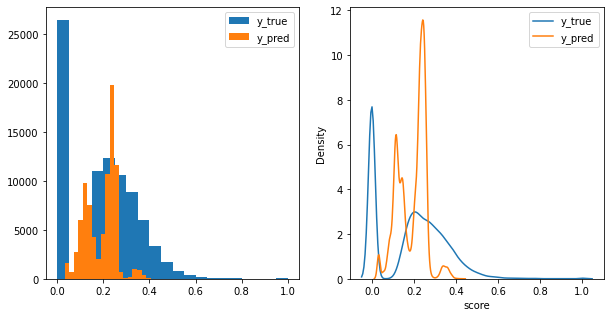

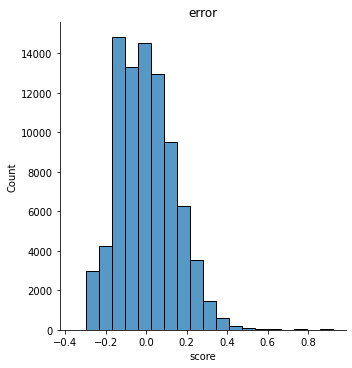

In [48]:
ltr_metrics.show_metrics('validation')